# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of this project is to support a used car dealership in understanding the key factors that drive vehicle resale prices. The dealership seeks to determine which vehicle characteristics are most strongly associated with higher or lower prices. These insights will drive pricing strategy and inventory acquisition by aligning purchasing decisions with consumer preferences.

From a data mining perspective, this task can be seen as a supervised learning regression problem. The target variable is vehicle price, and the predictor variables include observable attributes such as year, mileage, manufacturer, condition, transmission type, fule type, and other revelant features. The goal of this task is to estimate the relationship between these features and price in order to quanitfy their impact.

Success will be measured by the ability to clearly idenfity and interpret the most influential predictors of price and translate those findings into actionable business recommendations. The emphasis is not just on predictive accuracym but on generating meaningful, interpretable insights that can guide strategic decision making for the used car dealership.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [161]:
import matplotlib.pyplot as plt
import pandas as pd

### Load and Profile Data

In [162]:
# Load and Profile
path = './data/vehicles.csv'
df = pd.read_csv(path)

#Structure of Data
print ("row, cols:", df.shape)
display(df.head(10))

row, cols: (426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### Summarize Missing Values

In [163]:
#Summary of Missing Values
missing_values = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_values / len(df) * 100).round(2)
display(pd.DataFrame({"missing_count": missing_values, "missing_pct": missing_pct}))

,missing_count,missing_pct
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93
model,5277,1.24


#### Severe Missingness
- size - 71.8% missing
- cylinders - 41.6% missing
- condition - 40.8% missing

Major issues with data, particularly size. This variable will most likely not be reliable enough to include in model.

#### Moderate Missingness
- VIN - 37.7% missing
- drive - 30.6% missing
- paint_color - 30.5% missing
- type - 21.8% missing

May still be usable, but will need to make decisions on whether to drop, estimate values, or add indicator as to missing.

#### Low Missingness (<5%)
- manufacturer
- title_status
- model
- odometer
- fuel
- transmission
- year

Safe to keep after cleaning.

### Creating a Data Dictionary

In [164]:
#Numeric and Categorical summary
display(df.describe())
display(df.describe(include=["object"]))

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [165]:
#Data Dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Target Variable
price (int64)

#### Numeric Predictors
- year (float64) - model year (XXXX)
- odometer (float64) - mileage on odemeter in miles

#### Categorical Predictors
- region (object) - where the car is registered
- manufacturer (object) - car maker
- model (object) - specific type of car model
- condition (object) - current physical condition
- fuel (object) - type of fuel needed
- title_status (object) - current status of tittle
- transmission (object) - type of transmission
- drive (object) - type of drive
- size (object) - size of car
- type (object) - type of car
- paint_color (object) - paint color of car
- state (object) - state car is in 
- cylinders (object) - number of engine cylinders
- VIN (object) - VIN identification number

Two values should be examined:
cylinders is an object in the form of values such as "8 cylinders". This will require cleaning before modeling.\
VIN is an object but is really a form of identifier for the car. This will introduce high cardinality noise and should be dropped.\

#### Structural Observations
This data set has:
- 2 float columns
- 2 integer columns
- 14 categorical columns

Modeling, then, will require the following steps:
- encoding categorical variables
- handling missing data
- transforming any numeric variables that may be skewed

In [166]:
df["price"].describe()


count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

### Validity Checking

In [167]:
# Validity Checking
# Amount of Vehicles who's price listing is at zero
sum_of_priced_zero = (df['price'] == 0).sum()
print('Number of Cars Priced at Zero: ' + str(sum_of_priced_zero))
count_of_cars = (df['price']).count()
percent_priced_zero = (sum_of_priced_zero / count_of_cars) * 100
print('Percent of Cars Priced at Zero: ' + str(percent_priced_zero))
# Max Price Recorded
max_value =(df['price']).max()
print('Max Car Price: ' + str(max_value))
# Standard Deviation
mean_price = (df['price']).mean()
print('Mean: ' + str(mean_price))
median_price = (df['price']).median()
print('Median: ' + str(median_price))


Number of Cars Priced at Zero: 32895
Percent of Cars Priced at Zero: 7.7059126686656665
Max Car Price: 3736928711
Mean: 75199.0331873126
Median: 13950.0


#### Minimum Price of Zero
We have about 32,895 vehicles priced at zero, which is about 7.7% of the listings. This is not a realistic value for used vehicles, and likely due to errors such as placeholders, formatting issues, and so on. These values will distort regression, increase variance, and bias coefficients and be removed from the model.

#### Maximum Listed Price
The maximum listed price is 3,736,929,000. That number is not a realistic price for a used vehicle, and is a clear outlier and/or error.

#### Standard Deviation
The price mean is 75,199, where as the price median is 13,950. This indicates that the current distribution is extremely right-skewed and that there are large outliers in that direction.

#### Interpretation
If we do not clean up price, the recommendations will be distorted. We must remove zero-priced vehicles, remove extreme outliers, and possibly log transform the price column.

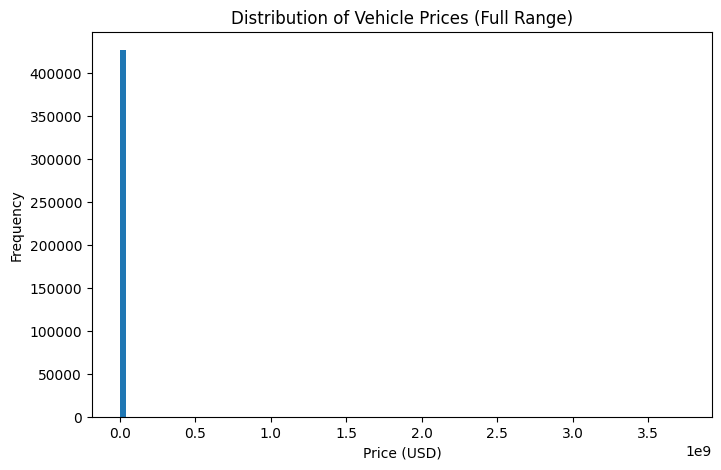

In [168]:
plt.figure(figsize=(8, 5))
plt.hist(df["price"], bins=100)
plt.title("Distribution of Vehicle Prices (Full Range)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

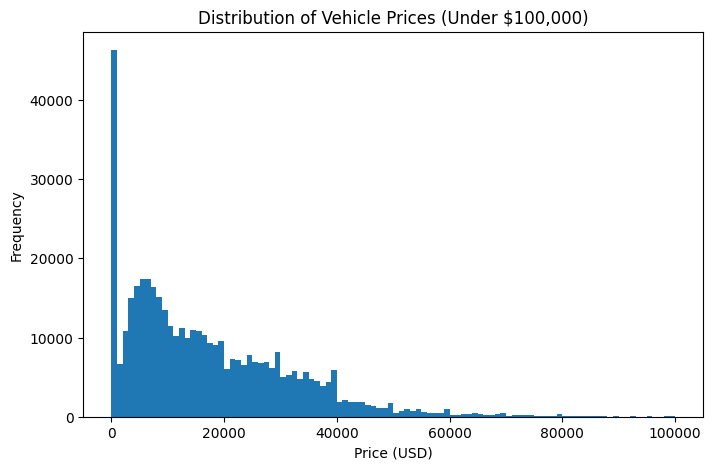

In [169]:
plt.figure(figsize=(8, 5))
plt.hist(df[df["price"] < 100000]["price"], bins=100)
plt.title("Distribution of Vehicle Prices (Under $100,000)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

#### Graphical Interpretation
- First plot confirms that there are extreme outliers. All values are collapsed into the first bin, indicating that the a small number of outliers are stretching the x axis, and that the majority of vehicles are clustered in a much smaller price range.
- Second plot confirms rightward skew of distribution, as you see an immediate spike, followed by a slow decline over time in frequencies. This confirms what we expect; most used cars are low priced and has a long right tail for price, following expected behavior in resale markets

#### What Does this All Mean Data Preparation for the Model?
- We must remove zero priced vehicles
- We must remove extreme outliers
- Price is strongly right skewed
- A log transformation of price might appropriate for price

### Numeric Predictors

In [170]:
# Understanding Numeric Predictors
df[["year", "odometer"]].describe()

,year,odometer
count,425675.000000,4.224800e+05
mean,2011.235191,9.804333e+04
std,9.452120,2.138815e+05
min,1900.000000,0.000000e+00
25%,2008.000000,3.770400e+04
50%,2013.000000,8.554800e+04
75%,2017.000000,1.335425e+05
max,2022.000000,1.000000e+07


In [171]:
print("Year range:", df["year"].min(), "to", df["year"].max())
print("Odometer range:", df["odometer"].min(), "to", df["odometer"].max())
df["year"].value_counts().sort_index().head(10)


Year range: 1900.0 to 2022.0
Odometer range: 0.0 to 10000000.0


year
1900.0    12
1901.0     3
1902.0     1
1903.0    12
1905.0     1
1909.0     1
1910.0     2
1913.0     2
1915.0     1
1916.0     2
Name: count, dtype: int64

In [172]:
cars_pre_1950 = (df["year"] < 1950).sum()
print("Cars Pre-1950: " + str(cars_pre_1950))

Cars Pre-1950: 1213


#### Intrepretation of Year
- 2022 is reasonable, 1900 is suspicious. This suggests data entry errors or placeholder values.
- Pricing strategy shoudl focus on modern vehicles
- Old vehicles could distort the year-price relationship

In [173]:
df["odometer"].describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [174]:
zero_mileage_cars = (df["odometer"] == 0).sum()
print('Zero Mileage Cars: ' + str(zero_mileage_cars))

Zero Mileage Cars: 1965


In [175]:
extreme_high_mileage_cars = (df["odometer"] > 500000).sum()
print('Extremely High Mileage Cars: ' + str(extreme_high_mileage_cars))

Extremely High Mileage Cars: 1386


In [176]:
cars_99_quantile = df["odometer"].quantile(0.99)
print('Cars in 99% Quantile of Mileage: ' + str(cars_99_quantile))


Cars in 99% Quantile of Mileage: 280000.0


#### Interpretation of Odometer
- 10,000,000 is not a realistic maximum. Indicates data entry errors
- O values may represent missing data
- 99th quartile value at 280,000 miles
- Indicates a right skewed distribution
- Extreme mileage errors distort depreciation modeling
- Unrealistic zero mileage values may indicate missing or miscoded data

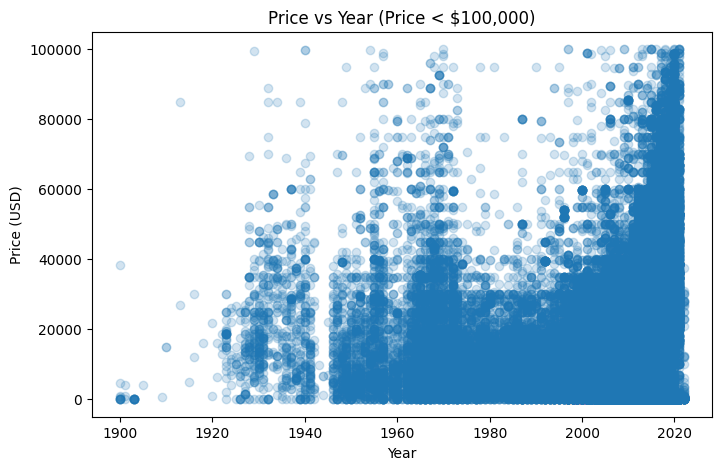

In [177]:
df_vis = df[df["price"] < 100000]

plt.figure(figsize=(8, 5))
plt.scatter(df_vis["year"], df_vis["price"], alpha=0.2)
plt.title("Price vs Year (Price < $100,000)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.show()

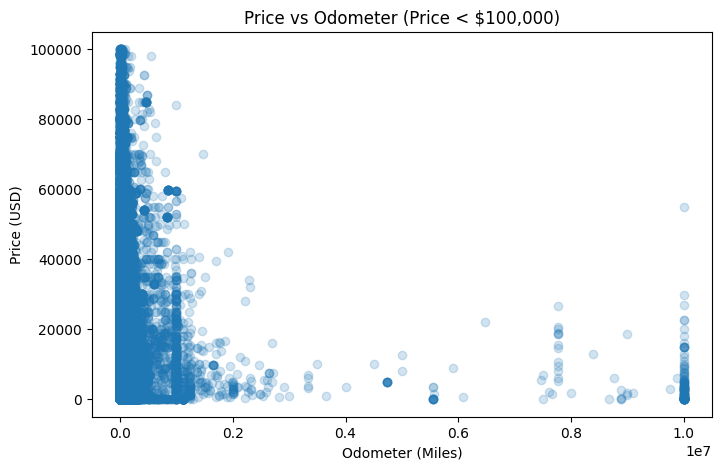

In [178]:
plt.figure(figsize=(8, 5))
plt.scatter(df_vis["odometer"], df_vis["price"], alpha=0.2)
plt.title("Price vs Odometer (Price < $100,000)")
plt.xlabel("Odometer (Miles)")
plt.ylabel("Price (USD)")
plt.show()

#### Price vs Year
- Positive relationship between year of vehicle manufacter and price 
- Newer vehicles command higher resale values
- Year is a strong indicator of price.
- Relationship is not perfectly linear
- Consumers place a premium on newer vehicles
- Inventory Acquisition should weigh model year heavily

#### Price vs Odometer
- Negative relationship between mileage and price
- Wear and tear reduces value
- Odometer is a key predictor
- High mileage vehicles will require discounts
- Low mileage vehicles are high value inventory

### Categorical Predictors

In [179]:
#Categorical Quality Issues
categorical_cols = df.select_dtypes(include=["object"]).columns

unique_counts = pd.DataFrame({
    "column": categorical_cols,
    "unique_values": [df[col].nunique() for col in categorical_cols]
}).sort_values("unique_values", ascending=False)

unique_counts

,column,unique_values
8,VIN,118246
2,model,29649
0,region,404
13,state,51
1,manufacturer,42
11,type,13
12,paint_color,12
4,cylinders,8
3,condition,6
6,title_status,6


In [180]:
df["manufacturer"].value_counts().head(15)


manufacturer
ford             70985
chevrolet        55064
toyota           34202
honda            21269
nissan           19067
jeep             19014
ram              18342
gmc              16785
bmw              14699
dodge            13707
mercedes-benz    11817
hyundai          10338
subaru            9495
volkswagen        9345
kia               8457
Name: count, dtype: int64

In [181]:
df["transmission"].value_counts()


transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [182]:
df["fuel"].value_counts()

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

In [183]:
df["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [184]:
df["cylinders"].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [185]:
df["drive"].value_counts()

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

In [186]:
df["title_status"].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [187]:
df["size"].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [188]:
df["type"].value_counts()

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [189]:
df['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

#### Categorical Variable Cardinality

##### Extremely High Cardinality
- VIN
- Model

##### Moderately High Cardinality
- Region
- State

##### Manageable Categorical Variables
- Manufacturer - Clean and Reliable
- Type - Clean and Reliable
- Paint Color - Clean and Reliable
- Cylinders - Messy, needs cleaning
- Condition - Clean and Reliable
- Title Status - Clean and Reliable. Strong Predictor
- Fuel - Clean and Reliable
- Size - Clean, but Poor Coverage
- Transmission - Potentially Noisy
- Drive - Clean and Reliable

### Checking for Duplicates

In [190]:
# Checking for duplicates
exact_duplicates = df.duplicated().sum()
print('Exact Duplicates: ' + str(exact_duplicates))

Exact Duplicates: 0


In [191]:
duplicate_VIN = df["VIN"].duplicated().sum()
print('VIN Duplicates: ' + str(duplicate_VIN))
unique_VIN = df["VIN"].nunique()
print('Unique VIN: ' + str(unique_VIN))
avg_VIN_listings = len(df) / unique_VIN
print('Average VIN Listings: ' + str(avg_VIN_listings))

VIN Duplicates: 308633
Unique VIN: 118246
Average VIN Listings: 3.6101009759315326


In [192]:
duplicate_ids = df["id"].duplicated().sum()
print('Duplicate IDs: ' + str(duplicate_ids)) 

Duplicate IDs: 0


### Leakage Risk Assessment
- No fully identical rows
- id is a unique row identifier
- Average of about 3.6 listings per VIN

The dataset contains no exact rows and the row level identifier is found to be unique. However, analyzing the VIN reveals a large amount of duplication at the vehicle level, with 118,246 unique VINs found in 426,880 listings. This is an indicator that there are many vehicles that appear multiple times, reflecting multiple or changing listings. This must be addressed while preparing data to prevent bias in the model.

### Data Representativeness

In [193]:
state_counts = df["state"].value_counts()
state_counts.head(10)

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
Name: count, dtype: int64

In [194]:
state_pct = df["state"].value_counts(normalize=True) * 100
state_pct.head(10)

state
ca    11.856728
fl     6.678926
tx     5.375047
ny     4.541323
oh     4.145427
or     4.006747
mi     3.958958
nc     3.578757
wa     3.247048
pa     3.221749
Name: proportion, dtype: float64

In [195]:
manufacturer_pct = df["manufacturer"].value_counts(normalize=True) * 100
manufacturer_pct.head(10)

manufacturer
ford         17.345822
chevrolet    13.455382
toyota        8.357566
honda         5.197271
nissan        4.659193
jeep          4.646242
ram           4.482032
gmc           4.101565
bmw           3.591833
dodge         3.349428
Name: proportion, dtype: float64

In [196]:
df["year"].describe()
df["year"].value_counts().sort_index().tail(10)

year
2013.0    30794
2014.0    30283
2015.0    31538
2016.0    30434
2017.0    36420
2018.0    36369
2019.0    25375
2020.0    19298
2021.0     2396
2022.0      133
Name: count, dtype: int64

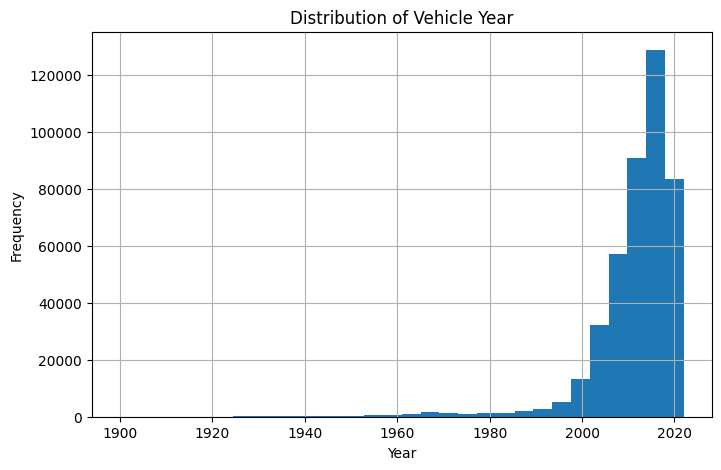

In [197]:

plt.figure(figsize=(8,5))
df["year"].hist(bins=30)
plt.title("Distribution of Vehicle Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [198]:
df["condition"].value_counts(normalize=True) * 100

condition
good         48.048865
excellent    40.141074
like new      8.378169
fair          2.677865
new           0.516267
salvage       0.237760
Name: proportion, dtype: float64

- Dataset is nationally distributed
- Major brands are represented well
- Vehicle years span a wide range
- Conditions seem realistic to used vehicles


The current dataset appears to be well suited as a representation of the used vehicle market in the United States. Listings are distribured geographically, and major brands in the market are well represented. However, the data as we've seen reflect listings, rather than unique vehicles. We have several predictors that exhibit missingness, and there are extreme outliers in the current data. We should move towards careful data preparation to address VIN duplication, the right ward skew due to outliers in price and year, and other data quality issues.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.